In [2]:
import numpy as np
import matplotlib.pyplot as plt

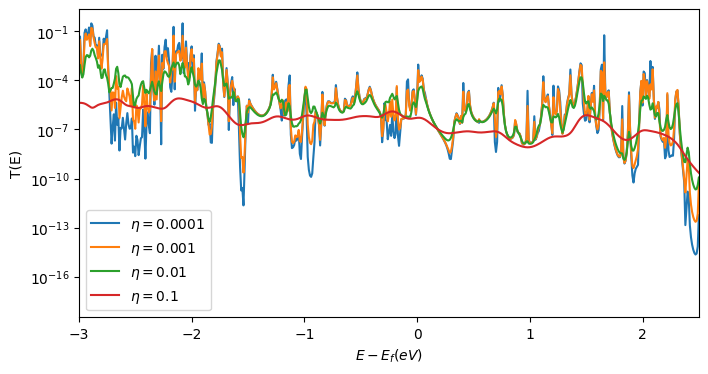

In [6]:
etas = [1e-4, 1e-3, 1e-2, 1e-1]
# etas = [1e-3]
plt.figure(figsize=(8,4))
for eta in etas:
    E,T = np.load(f'transmission_function/ET_eta{eta}.npy')
    plt.plot(E,T,label=rf'$\eta = {eta}$')

    if any(value > 1 for value in T):
        print(f"Warning: Values in T for eta={eta} exceed 1.")

plt.xlim(-3,2.5)
plt.xlabel(r'$E-E_{f}(eV)$')
plt.ylabel('T(E)')
plt.yscale('log')
# plt.ylim(bottom=1e-1)
plt.legend()

## DOS GPAW


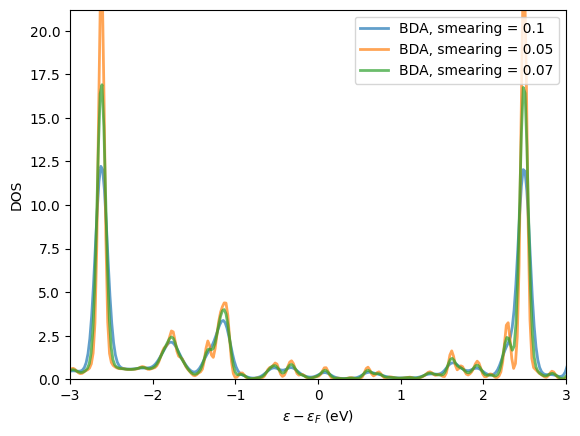

In [34]:
e_f = np.loadtxt('dft/device/fermi_scatt.txt')
smearing = [1e-1,0.05, 0.07]
for s in smearing:
    energy, dos = np.load(f'dos/gpaw/smearing_{s}/total_dos.npy' )
    energy, C_pdos = np.load(f'dos/gpaw/smearing_{s}/C_pdos.npy' )
    energy, N_pdos = np.load(f'dos/gpaw/smearing_{s}/N_pdos.npy' )
    energy, H_pdos = np.load(f'dos/gpaw/smearing_{s}/H_pdos.npy')
    energy, Au_pdos = np.load(f'dos/gpaw/smearing_{s}/Au_pdos.npy' )
    energy, bridge_pdos = np.load(f'dos/gpaw/smearing_{s}/bridge_pdos.npy')
    # plt.plot(energy - e_f, total_dos, label='Total', c='k', lw=2, alpha=0.7)
    plt.plot(energy - e_f, bridge_pdos, label=f'BDA, smearing = {s}', lw=2, alpha=0.7)
    # plt.plot(energy - e_f, C_pdos, label='C', c='blue', lw=2, alpha=0.7)
    # plt.plot(energy - e_f, Au_pdos, label='Au', c='green', lw=2, alpha=0.7)


plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.ylabel('DOS')
plt.xlim(-3,3)
plt.ylim(bottom=0)
# plt.yscale('log')
plt.legend(loc=1)


## DOS qtpyt

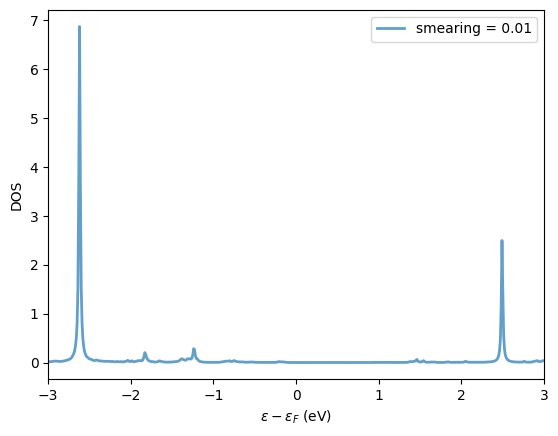

In [15]:
# etas = [1e-3, 1e-2, 1e-1]
etas = [1e-2]
energy = np.load("dos/qtpyt/energies.npy")
for eta in etas:
    dos = np.load(f'dos/qtpyt/active_C_pz/pdos_eta_{eta}.npy' )
    plt.plot(energy, dos, label=f'smearing = {eta}', lw=2, alpha=0.7)
plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.ylabel('DOS')
plt.xlim(-3,3)
# plt.ylim(bottom=0)
# plt.yscale('log')
plt.legend(loc=1)


### GPAW vs qtpyt DOS 

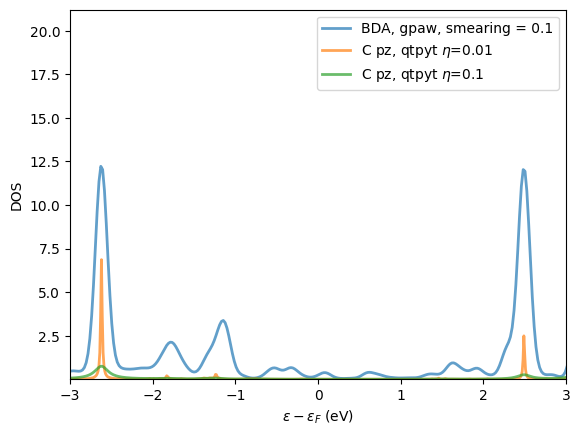

In [22]:
e_f = np.loadtxt('dft/device/fermi_scatt.txt')
smearing = [1e-1]
for s in smearing:
    energy, bridge_pdos = np.load(f'dos/gpaw/smearing_{s}/bridge_pdos.npy')
    plt.plot(energy - e_f, bridge_pdos, label=f'BDA, gpaw, smearing = {s}', lw=2, alpha=0.7)

etas = [1e-2,1e-1]
energy = np.load("dos/qtpyt/energies.npy")
for eta in etas:
    dos = np.load(f'dos/qtpyt/active_C_pz/pdos_eta_{eta}.npy' )
    plt.plot(energy, dos, label=rf'C pz, qtpyt, $\eta$={eta}', lw=2, alpha=0.7)

plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.ylabel('DOS')
plt.xlim(-3,3)
plt.ylim(bottom=1e-3)
# plt.yscale('log')
plt.legend(loc=1)
plt.show()

In [2]:
from pathlib import Path
import numpy as np
los_path = Path('./localized_orbitals/BDA_active/')
dft_path = Path('./dft/device/')

h_los = np.load(los_path / f'hs_lolw_k.npy')
h_dft = np.load(dft_path / f'hs_cc_k.npy')

print(h_los.shape,h_dft.shape)

(2, 1, 2376, 2376) (2, 1, 2376, 2376)
